# Web scrapping (taux de change, aluminium, brent, fuel france, copper)


In [64]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd

In [65]:
import io
import codecs

In [66]:
li_annees_voulues = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [67]:
urla = 'www.boursorama.com'

In [68]:
#on recupere les liens des differentes pages

li_url_taux_de_change = []
li_url_alu_alloy = []
li_url_copper = []

for an in li_annees_voulues:
    li_url_taux_de_change.append('www.boursorama.com/_formulaire-periode/?symbol=3fUSD_EUR&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')
    li_url_alu_alloy.append('www.boursorama.com/_formulaire-periode/?symbol=7xAAUSD&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')
    li_url_copper.append('www.boursorama.com/_formulaire-periode/?symbol=7xCAUSD15M&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')

## Aluminium alloy

In [69]:
#on cree un dictionnaire pour l'aluminium dont les clés sont les dates et les valeurs du cours à cette date
data_alu_alloy = {}

for url in li_url_alu_alloy :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_alu_alloy[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()
            
data_alu_alloy

{'03/03/2016': '1 535.00',
 '02/03/2016': '1 520.00',
 '01/03/2016': '1 515.00',
 '29/02/2016': '1 575.00',
 '25/02/2016': '1 560.00',
 '24/02/2016': '1 570.00',
 '23/02/2016': '1 570.00',
 '22/02/2016': '1 570.00',
 '18/02/2016': '1 570.00',
 '17/02/2016': '1 570.00',
 '16/02/2016': '1 570.00',
 '15/02/2016': '1 560.50',
 '11/02/2016': '1 585.00',
 '10/02/2016': '1 570.00',
 '09/02/2016': '1 575.00',
 '08/02/2016': '1 525.00',
 '04/02/2016': '1 521.00',
 '03/02/2016': '1 535.00',
 '02/02/2016': '1 560.00',
 '01/02/2016': '1 540.00',
 '28/01/2016': '1 580.00',
 '27/01/2016': '1 550.00',
 '26/01/2016': '1 510.00',
 '25/01/2016': '1 530.00',
 '20/01/2016': '1 560.00',
 '19/01/2016': '1 560.00',
 '18/01/2016': '1 551.00',
 '14/01/2016': '1 570.00',
 '13/01/2016': '1 595.00',
 '12/01/2016': '1 600.00',
 '11/01/2016': '1 600.00',
 '07/01/2016': '1 581.00',
 '06/01/2016': '1 561.00',
 '05/01/2016': '1 615.00',
 '04/01/2016': '1 605.00',
 '30/12/2015': '1 610.00',
 '29/12/2015': '1 605.00',
 

## Taux de change

In [70]:
#on cree un dictionnaire pour le taux de change dont les clés sont les dates et les valeurs le taux de change à la date correspondante

data_taux_de_change = {}

for url in li_url_taux_de_change :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_taux_de_change[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()

data_taux_de_change

{'04/03/2016': '0.91',
 '03/03/2016': '0.91',
 '02/03/2016': '0.92',
 '01/03/2016': '0.92',
 '29/02/2016': '0.92',
 '26/02/2016': '0.91',
 '25/02/2016': '0.91',
 '24/02/2016': '0.91',
 '23/02/2016': '0.91',
 '22/02/2016': '0.91',
 '19/02/2016': '0.90',
 '18/02/2016': '0.90',
 '17/02/2016': '0.90',
 '16/02/2016': '0.90',
 '15/02/2016': '0.90',
 '12/02/2016': '0.89',
 '11/02/2016': '0.88',
 '10/02/2016': '0.89',
 '09/02/2016': '0.89',
 '08/02/2016': '0.89',
 '05/02/2016': '0.90',
 '04/02/2016': '0.89',
 '03/02/2016': '0.90',
 '02/02/2016': '0.92',
 '29/01/2016': '0.92',
 '28/01/2016': '0.91',
 '27/01/2016': '0.92',
 '26/01/2016': '0.92',
 '25/01/2016': '0.92',
 '22/01/2016': '0.93',
 '21/01/2016': '0.92',
 '20/01/2016': '0.92',
 '19/01/2016': '0.92',
 '18/01/2016': '0.92',
 '15/01/2016': '0.92',
 '14/01/2016': '0.92',
 '13/01/2016': '0.92',
 '12/01/2016': '0.92',
 '11/01/2016': '0.92',
 '08/01/2016': '0.92',
 '07/01/2016': '0.92',
 '06/01/2016': '0.93',
 '05/01/2016': '0.93',
 '04/01/201

## Copper

In [71]:
#on cree un dictionnaire pour le taux de change dont les clés sont les dates et les valeurs le taux de change à la date correspondante

data_copper = {}

for url in li_url_copper :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_copper[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()

data_copper

{'04/03/2016': '4 997.50',
 '03/03/2016': '4 823.00',
 '02/03/2016': '4 769.00',
 '01/03/2016': '4 698.50',
 '29/02/2016': '4 678.00',
 '26/02/2016': '4 693.00',
 '25/02/2016': '4 589.50',
 '24/02/2016': '4 634.00',
 '23/02/2016': '4 640.50',
 '22/02/2016': '4 689.50',
 '19/02/2016': '4 617.25',
 '18/02/2016': '4 569.75',
 '17/02/2016': '4 589.75',
 '16/02/2016': '4 548.50',
 '15/02/2016': '4 547.00',
 '12/02/2016': '4 484.50',
 '11/02/2016': '4 428.25',
 '10/02/2016': '4 426.25',
 '09/02/2016': '4 495.50',
 '08/02/2016': '4 597.75',
 '05/02/2016': '4 615.25',
 '04/02/2016': '4 669.25',
 '03/02/2016': '4 620.50',
 '02/02/2016': '4 535.25',
 '29/01/2016': '4 544.00',
 '28/01/2016': '4 510.00',
 '27/01/2016': '4 572.00',
 '26/01/2016': '4 518.25',
 '25/01/2016': '4 407.25',
 '22/01/2016': '4 427.00',
 '21/01/2016': '4 420.00',
 '20/01/2016': '4 351.00',
 '19/01/2016': '4 395.00',
 '18/01/2016': '4 370.50',
 '15/01/2016': '4 325.00',
 '14/01/2016': '4 404.50',
 '13/01/2016': '4 384.50',
 

## Brent

In [72]:
URL = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DCOILBRENTEU&scale=left&cosd=2017-05-23&coed=2022-05-23&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-05-27&revision_date=2022-05-27&nd=1987-05-20"
response = requests.get(URL)
open("brent_europe.csv", "wb").write(response.content)
brent_data = response.content.decode('utf8')

a = brent_data.replace('-', '/')
a.replace('\n', ',')

data = io.StringIO(a)
df = pd.read_csv(data, sep=",")
df_brent = df.rename(columns = {'DATE' : 'Date'})


df_brent['Date'] = pd.to_datetime(df_brent['Date'], errors = 'coerce')
df_brent['Date'] = df_brent['Date'].dt.strftime('%d/%m/%Y')
df_brent_vrai = df_brent.set_index('Date')

df_brent_vrai['DCOILBRENTEU'] = df_brent_vrai['DCOILBRENTEU'].str.replace(' ', '')
df_brent_vrai['DCOILBRENTEU'] = pd.to_numeric(df_brent_vrai['DCOILBRENTEU'], errors='coerce')

## Fuel France

In [130]:
data_fuel_fr = {}
r = requests.get('https://' + 'www.cnr.fr/espaces/13/indicateurs/43?noContext=1')
soup = BeautifulSoup(r.content, 'html.parser')
rows_value = soup.select('tr td span')
rows_date = soup.select('tr th')

In [131]:
li_dates = []
for el in rows_date[1:]:
    li_dates.append(el.text.strip())

In [132]:
li_mois = []

for date in li_dates:
    for i in range(1,13):
        li_mois.append(str(i) + '/' + date)

In [135]:
data_fuel_fr = {}

for mois in range(1, 13) :
    for an in li_dates:
        for k in range(1,32):
            if k<=9:
                if mois <= 9:
                    data_fuel_fr['0' + str(k) + '/0' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
                else:
                    data_fuel_fr['0'+str(k) + '/' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
            else :
                if mois <=9:
                    data_fuel_fr[str(k) + '/0' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
                else:
                    data_fuel_fr[str(k) + '/' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')

                    



In [136]:
data_fuel_fr

{'01/01/2000': '0.6690',
 '02/01/2000': '0.6690',
 '03/01/2000': '0.6690',
 '04/01/2000': '0.6690',
 '05/01/2000': '0.6690',
 '06/01/2000': '0.6690',
 '07/01/2000': '0.6690',
 '08/01/2000': '0.6690',
 '09/01/2000': '0.6690',
 '10/01/2000': '0.6690',
 '11/01/2000': '0.6690',
 '12/01/2000': '0.6690',
 '13/01/2000': '0.6690',
 '14/01/2000': '0.6690',
 '15/01/2000': '0.6690',
 '16/01/2000': '0.6690',
 '17/01/2000': '0.6690',
 '18/01/2000': '0.6690',
 '19/01/2000': '0.6690',
 '20/01/2000': '0.6690',
 '21/01/2000': '0.6690',
 '22/01/2000': '0.6690',
 '23/01/2000': '0.6690',
 '24/01/2000': '0.6690',
 '25/01/2000': '0.6690',
 '26/01/2000': '0.6690',
 '27/01/2000': '0.6690',
 '28/01/2000': '0.6690',
 '29/01/2000': '0.6690',
 '30/01/2000': '0.6690',
 '31/01/2000': '0.6690',
 '01/01/2001': '0.6720',
 '02/01/2001': '0.6720',
 '03/01/2001': '0.6720',
 '04/01/2001': '0.6720',
 '05/01/2001': '0.6720',
 '06/01/2001': '0.6720',
 '07/01/2001': '0.6720',
 '08/01/2001': '0.6720',
 '09/01/2001': '0.6720',


## coils 

In [116]:
file = codecs.open('MEPS-Europe Hot Dipped Galvanised Coil Price Forecast.html')
r = bytes(file.read(), 'utf-8')
soup = BeautifulSoup(r, 'html.parser')
rows_date = soup.select('tr td b')[3:]
rows_value = soup.select('tr td.price')

dic_coils = {}

for k in range(len(rows_date)):
    for i in range(1,32):
        if i <= 9:
            if (5 + k)%12 + 1 < 10:
                dic_coils['0' + str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_coils['0' + str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
        else :
            if (5 + k)%12 + 1 < 10:
                dic_coils[str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_coils[str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)


In [117]:
dic_coils

{'01/06/2017': 734.0,
 '02/06/2017': 734.0,
 '03/06/2017': 734.0,
 '04/06/2017': 734.0,
 '05/06/2017': 734.0,
 '06/06/2017': 734.0,
 '07/06/2017': 734.0,
 '08/06/2017': 734.0,
 '09/06/2017': 734.0,
 '10/06/2017': 734.0,
 '11/06/2017': 734.0,
 '12/06/2017': 734.0,
 '13/06/2017': 734.0,
 '14/06/2017': 734.0,
 '15/06/2017': 734.0,
 '16/06/2017': 734.0,
 '17/06/2017': 734.0,
 '18/06/2017': 734.0,
 '19/06/2017': 734.0,
 '20/06/2017': 734.0,
 '21/06/2017': 734.0,
 '22/06/2017': 734.0,
 '23/06/2017': 734.0,
 '24/06/2017': 734.0,
 '25/06/2017': 734.0,
 '26/06/2017': 734.0,
 '27/06/2017': 734.0,
 '28/06/2017': 734.0,
 '29/06/2017': 734.0,
 '30/06/2017': 734.0,
 '31/06/2017': 734.0,
 '01/07/2017': 701.0,
 '02/07/2017': 701.0,
 '03/07/2017': 701.0,
 '04/07/2017': 701.0,
 '05/07/2017': 701.0,
 '06/07/2017': 701.0,
 '07/07/2017': 701.0,
 '08/07/2017': 701.0,
 '09/07/2017': 701.0,
 '10/07/2017': 701.0,
 '11/07/2017': 701.0,
 '12/07/2017': 701.0,
 '13/07/2017': 701.0,
 '14/07/2017': 701.0,
 '15/07/20

## beams

In [118]:
file = codecs.open('MEPS-Europe Sections & Beams Price Forecast.html')
r = bytes(file.read(), 'utf-8')
soup = BeautifulSoup(r, 'html.parser')
rows_date = soup.select('tr td b')[3:]
rows_value = soup.select('tr td.price')

dic_beams = {}

for k in range(len(rows_date)):
    for i in range(1,32):
        if i <= 9:
            if (5 + k)%12 + 1 < 10:
                dic_beams['0' + str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_beams['0' + str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
        else :
            if (5 + k)%12 + 1 < 10:
                dic_beams[str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_beams[str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)


In [119]:
dic_beams

{'01/06/2017': 551.0,
 '02/06/2017': 551.0,
 '03/06/2017': 551.0,
 '04/06/2017': 551.0,
 '05/06/2017': 551.0,
 '06/06/2017': 551.0,
 '07/06/2017': 551.0,
 '08/06/2017': 551.0,
 '09/06/2017': 551.0,
 '10/06/2017': 551.0,
 '11/06/2017': 551.0,
 '12/06/2017': 551.0,
 '13/06/2017': 551.0,
 '14/06/2017': 551.0,
 '15/06/2017': 551.0,
 '16/06/2017': 551.0,
 '17/06/2017': 551.0,
 '18/06/2017': 551.0,
 '19/06/2017': 551.0,
 '20/06/2017': 551.0,
 '21/06/2017': 551.0,
 '22/06/2017': 551.0,
 '23/06/2017': 551.0,
 '24/06/2017': 551.0,
 '25/06/2017': 551.0,
 '26/06/2017': 551.0,
 '27/06/2017': 551.0,
 '28/06/2017': 551.0,
 '29/06/2017': 551.0,
 '30/06/2017': 551.0,
 '31/06/2017': 551.0,
 '01/07/2017': 555.0,
 '02/07/2017': 555.0,
 '03/07/2017': 555.0,
 '04/07/2017': 555.0,
 '05/07/2017': 555.0,
 '06/07/2017': 555.0,
 '07/07/2017': 555.0,
 '08/07/2017': 555.0,
 '09/07/2017': 555.0,
 '10/07/2017': 555.0,
 '11/07/2017': 555.0,
 '12/07/2017': 555.0,
 '13/07/2017': 555.0,
 '14/07/2017': 555.0,
 '15/07/20

## Enregistrement sous le format .csv

In [137]:
#convertit le dictionnaire data en dataframe en convertissant les valeurs par des float

df_alu_alloy = pd.DataFrame.from_dict(data_alu_alloy, orient = 'index', columns = ['aluminium (USD)'])
df_alu_alloy['aluminium (USD)'] = df_alu_alloy['aluminium (USD)'].str.replace(' ', '')
df_alu_alloy['aluminium (USD)'] = pd.to_numeric(df_alu_alloy['aluminium (USD)'], errors='coerce')

df_taux_de_change = pd.DataFrame.from_dict(data_taux_de_change, orient = 'index', columns = ['USD/EUROS'])
df_taux_de_change['USD/EUROS'] = pd.to_numeric(df_taux_de_change['USD/EUROS'], errors='coerce')

df_copper = pd.DataFrame.from_dict(data_copper, orient = 'index', columns = ['copper'])
df_copper['copper'] = df_copper['copper'].str.replace(' ', '')
df_copper['copper'] = pd.to_numeric(df_copper['copper'], errors='coerce')

df_fuel_fr = pd.DataFrame.from_dict(data_fuel_fr, orient = 'index', columns = ['fuel fr EUR/L'])
df_fuel_fr['fuel fr EUR/L'] = df_fuel_fr['fuel fr EUR/L'].str.replace(' ', '')
df_fuel_fr['fuel fr EUR/L'] = pd.to_numeric(df_fuel_fr['fuel fr EUR/L'], errors='coerce')

df_coils = pd.DataFrame.from_dict(dic_coils, orient = 'index', columns = ['coils EUR/ton'])

df_beams = pd.DataFrame.from_dict(dic_beams, orient = 'index', columns = ['beams EUR/ton'])



In [80]:
#cree un fichier csv avec en index les dates et en colonne les cours aux différents moments

df_alu_alloy.to_csv (r'Alu_alloy_LME.csv', index = True, header=True)
df_taux_de_change.to_csv (r'Taux_echange.csv', index = True, header=True)
df_copper.to_csv (r'copper_LME.csv', index = True, header=True)
df_fuel_fr.to_csv(r'fuel_fr.csv', index = True, header=True)
df_coils.to_csv(r'coils.csv', index = True, header=True)
df_beams.to_csv(r'beams.csv', index=True, header = True)

In [138]:
tab_f = df_alu_alloy.join(df_taux_de_change).join(df_copper)
tab_f = tab_f.join(df_brent_vrai)
tab_f = tab_f.join(df_fuel_fr)
tab_f = tab_f.join(df_coils)
tab_f = tab_f.join(df_beams)

In [144]:
tab_f['Date'] = tab_f.index

<AxesSubplot:>

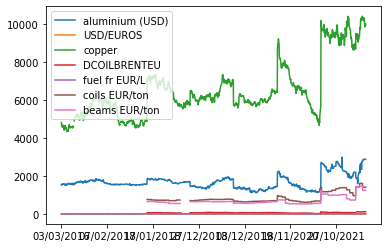

In [150]:
tab_f.plot()

In [147]:
tab_melted = pd.melt(tab_f, id_vars=['Date'])

In [148]:
tab_melted.to_csv(r'tableau_final.csv', index = True, header = True)